## Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Raw  Data

In [47]:
df = pd.read_csv("D:/DataSet/blinkit_data.csv")

## Sample Data

In [48]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [49]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


## Data info

In [50]:
print("The size of Data:", df.shape)

The size of Data: (8523, 12)


In [51]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [52]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [53]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [56]:
df['Item Weight'] = df.groupby('Item Identifier')['Item Weight'].transform(
    lambda x: x.fillna(x.mean())
)

# Still if any remain missing → fill with overall mean
df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)


In [57]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

## Data Cleaning

In [58]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [59]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                                'low fat': 'Low Fat',
                                                                'reg': 'Regular'
                                                              })

In [60]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [61]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

#No of Items Sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales: ${avg_sales:,.2f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.1f}")

Total Sales: $1,201,681.48
Average Sales: $140.99
No of Items Sold: 8,523
Average Ratings: 4.0


## Charts  Requirement

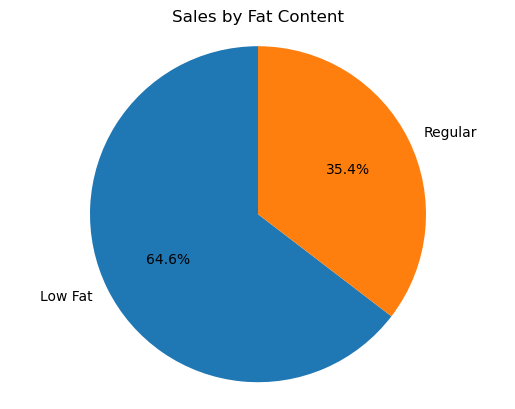

In [62]:
# Total sales by Fat Content

sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels= sales_by_fat.index,
                        autopct = '%.1f%%',
                        startangle=90
                        )

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

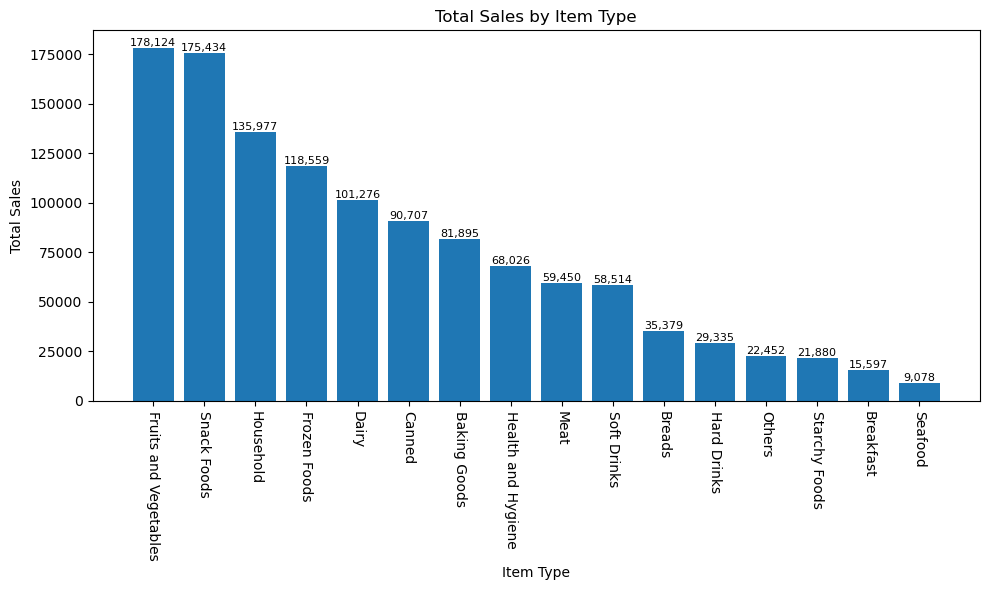

In [63]:
# Total sales by Item Type

sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize = (10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

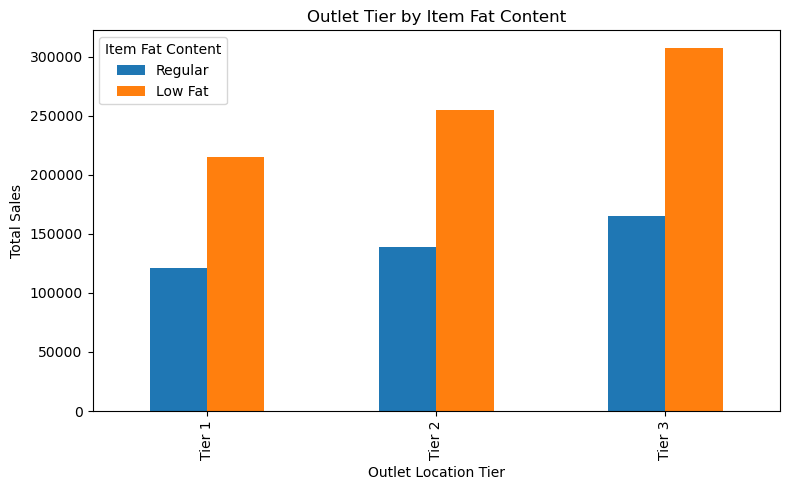

In [64]:
# Fat Content by Outlet for Total Sales

grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

<class 'function'>


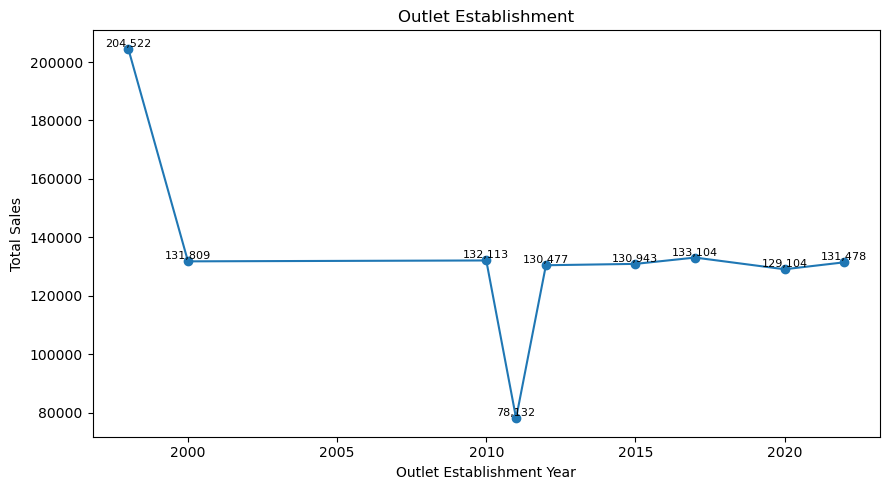

In [65]:
# Total Sales by Outlet Establishment

sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize = (9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
print(type(plt.xlabel))


for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

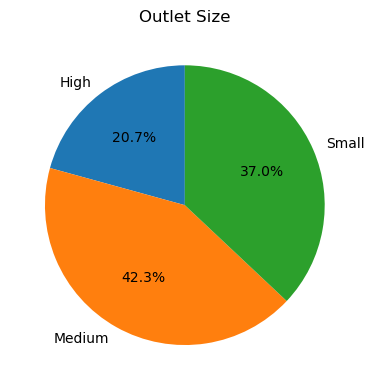

In [66]:
#Sales by Outlet Size

sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

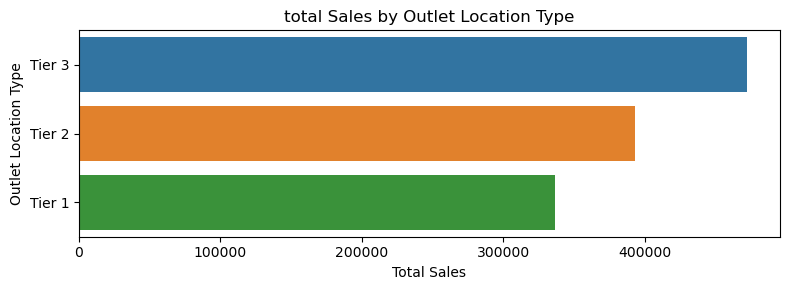

In [67]:
#Sales by Outlet Locations

sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending = False)

plt.figure(figsize=(8, 3)) #Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout() # Ensures layout fits without scroll
plt.show()

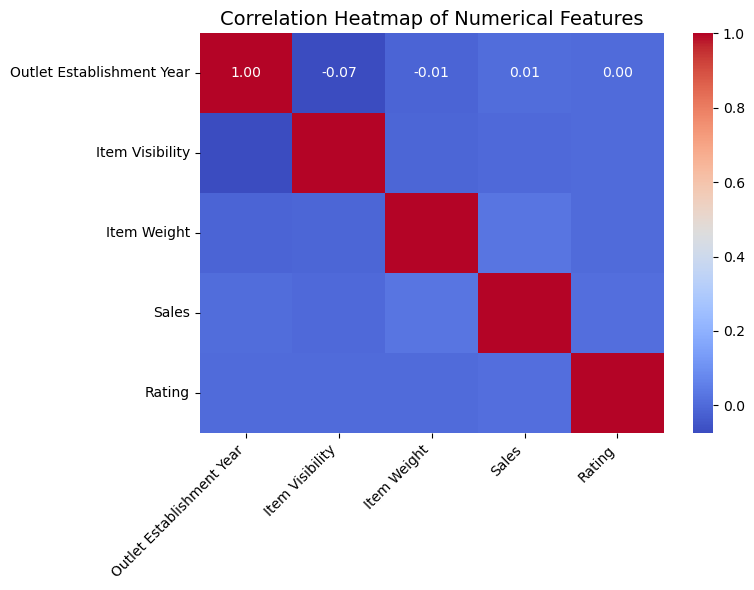

In [80]:
# Keep only numeric features
numeric_df = df.select_dtypes(include=['number'])

# Build correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))  # increase size a bit
sns.heatmap(
    corr_matrix, 
    annot=True,        # show numbers
    cmap="coolwarm", 
    fmt=".2f", 
    annot_kws={"size":10}  # increase font size for numbers
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha='right')  # rotate labels for clarity
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

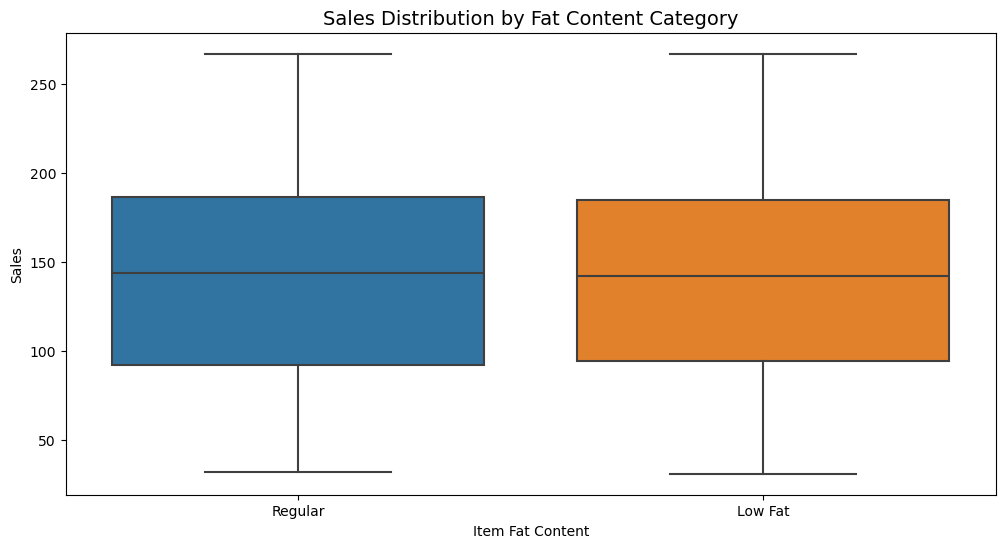

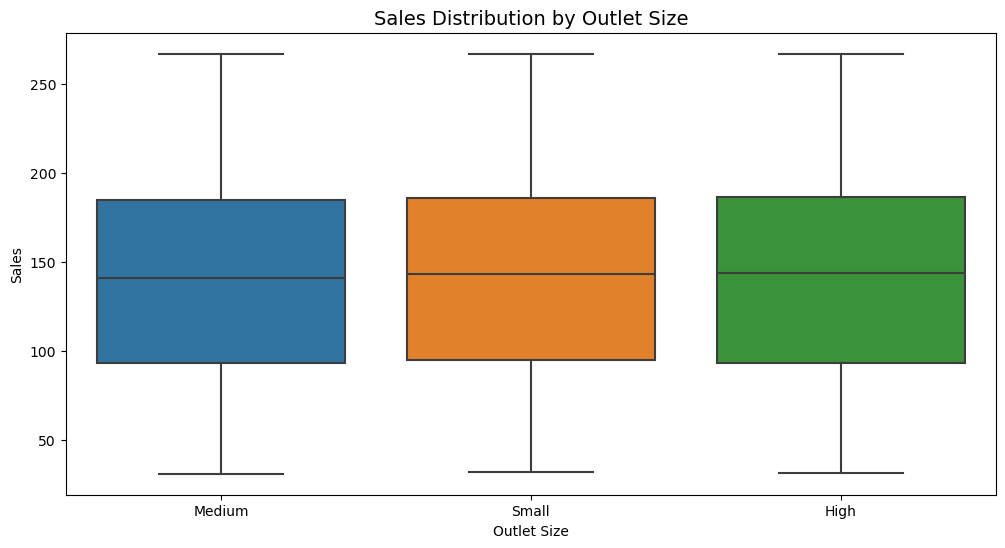

In [82]:
# Add Category-wise Sales Distribution (Boxplots)


plt.figure(figsize=(12,6))
sns.boxplot(x="Item Fat Content", y="Sales", data=df)
plt.title("Sales Distribution by Fat Content Category", fontsize=14)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Outlet Size", y="Sales", data=df)
plt.title("Sales Distribution by Outlet Size", fontsize=14)
plt.show()


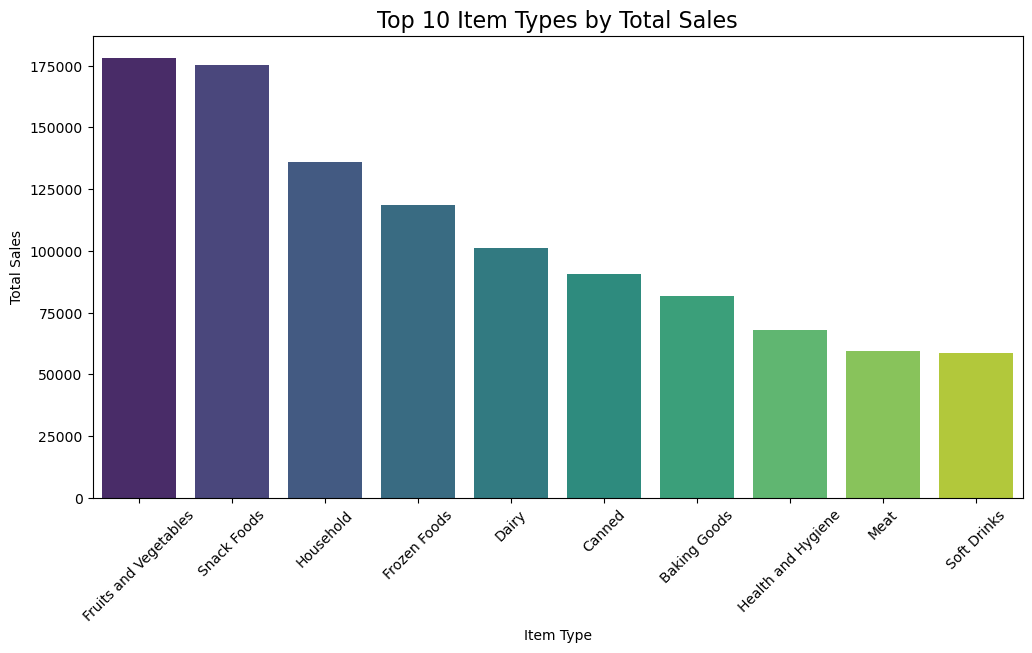

In [83]:
# Top-N Categories contributing to Sales


top_items = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")
plt.title("Top 10 Item Types by Total Sales", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()